In [ ]:
# Load necessary python packages
import numpy as np
import pandas as pd

# Load train, test datasets
train = pd.read_csv("covid_19_train.csv")
#test = pd.read_csv("covid_19_test.csv")
#sub = pd.read_csv("covid_19_submission.csv")

import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# Extract labelled column from train dataset
y = train.covid_19.values

# Drops labelled column, to be ready for model training/ data cleaning
train_test = train.drop("covid_19", axis='columns')

# combines training and testing dataset
#x = pd.concat([train_test, test])
x = train_test

# Check for NA or NAN presence in each column
x_check_na = x.isna().any()


x_summary = x.describe()
x_summary = x_summary.T

# Select columns that consist of less than 10% of NA/ NAN
x_cleared = x.loc[:, x.isnull().mean() < 0.9]

# Fill in NA/ NAN fields with each column's median value
x_cleared = x_cleared.fillna(x.median(0)).copy(deep=True)

# Check that all columns do not have NA/ NAN values
x_check_na = x_cleared.isna().any()

# Get correlation matrix, for purpose of removing highly correlated rows
x_cleared1 = x_cleared.corr()
x_cleared1.reset_index(inplace=True)

# Modify correlation matrix to tabular format
x_cleared2 = pd.melt(x_cleared1, id_vars=['index'])
# Remove same column correlations of 1.0
x_cleared2 = x_cleared2[x_cleared2['index']!=x_cleared2['variable']]
# Order correlation in descending value
x_cleared2 = x_cleared2.sort_values(by=['value'], ascending=False)

# Highlight column correlations above 0.85, to remove due to high correlation value
x_cleared2 = x_cleared2[abs(x_cleared2['value'])>0.85]
x_cleared2 = x_cleared2.iloc[::2, :]

# Remove columns that are highly correlated
x_cleared.drop(x_cleared2['index'], axis=1, inplace=True)
x_cleared = x_cleared.drop('id', axis='columns')

# Force remaining columns to numeric type
x_cleared = x_cleared.apply(pd.to_numeric, errors = 'coerce') 
x_check_na = x_cleared.isna().any()

dataset123 = x_cleared.iloc[:4000, :]
#x_test1 = x_cleared.iloc[4000:, :]

In [ ]:
dataset123 = dataset123.drop('Parainfluenza 2', 1) 
dataset123.columns

Index(['age_quantile', 'Patient addmited to regular ward',
       'Patient addmited to semi-intensive unit',
       'Patient addmited to intensive care unit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Monocytes', 'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')

In [ ]:
train['covid_19'].value_counts()

0    3594
1     406
Name: covid_19, dtype: int64

In [ ]:
 # Data Normalization
 dataset123 = (dataset123 - np.min(dataset123)) / (np.max(dataset123) - np.min(dataset123))

Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(dataset123)
x_pca = pd.DataFrame(x_pca)
x_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.309454,-0.013782,-0.011497,-0.006439,-0.017171,0.001210,-0.008337,0.006387,-0.001043,-0.007444,-0.002372,-0.003099,-0.000783,-0.006257,-0.004686,-0.001829,0.002280,0.002793,-0.000056,0.001614,-0.001637,-0.003424,-0.003699,-0.000952,0.000665,-0.001176,-0.004045,-0.000202,-0.000916,-0.001336,0.000257,-0.000094,0.000169
1,0.464395,-0.158637,-0.032492,-0.029799,-0.000927,-0.025930,-0.004834,-0.013716,-0.018512,0.010576,0.005869,0.000700,-0.001400,0.000002,0.000238,0.007370,0.000708,-0.003919,-0.005839,-0.002955,-0.001295,-0.002132,-0.001401,-0.002563,-0.001678,-0.000788,0.001354,0.001389,0.003994,-0.000141,-0.001350,-0.001481,-0.000409
2,0.200102,-0.111153,-0.018584,-0.009562,-0.012213,-0.077710,0.001003,-0.017422,-0.033797,0.023303,-0.131891,-0.065561,-0.120221,0.100833,0.291595,0.186283,0.012959,0.015595,-0.047143,0.149476,0.011124,0.028453,0.230889,0.034183,-0.188756,0.055960,-0.022839,0.030580,-0.020138,0.000525,-0.027635,-0.001481,0.021365
3,-0.334169,0.013116,-0.030870,0.962652,-0.029558,0.013712,0.086363,0.084613,-0.279976,-0.056958,-0.004977,-0.115407,0.017991,0.027267,0.060415,-0.006596,0.080448,-0.059535,-0.258246,0.220486,0.052154,0.012198,0.088058,0.010562,-0.048661,0.014578,0.027570,-0.052337,0.058059,-0.000434,0.045872,0.001386,-0.055936
4,0.154856,-0.100695,-0.024094,-0.020455,-0.007425,-0.015074,-0.006235,-0.005675,-0.011524,0.003368,0.002573,-0.000820,-0.001153,-0.002501,-0.001732,0.003690,0.001337,-0.001234,-0.003526,-0.001127,-0.001432,-0.002649,-0.002320,-0.001919,-0.000741,-0.000943,-0.000806,0.000752,0.002030,-0.000619,-0.000707,-0.000926,-0.000178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.334177,1.004813,-0.002851,-0.023773,-0.044811,-0.049425,-0.015903,0.026807,-0.002231,-0.014836,-0.016879,0.004367,-0.008382,-0.010311,-0.000299,-0.003272,-0.002961,-0.020367,-0.002253,0.003713,-0.001166,-0.008195,-0.023842,-0.001855,-0.000640,-0.013007,-0.023492,-0.006710,-0.004046,-0.001151,0.001383,0.000862,0.001716
3996,0.309625,-0.129666,-0.028293,-0.025127,-0.004176,-0.020502,-0.005535,-0.009695,-0.015018,0.006972,0.004221,-0.000060,-0.001276,-0.001249,-0.000747,0.005530,0.001022,-0.002577,-0.004682,-0.002041,-0.001364,-0.002390,-0.001860,-0.002241,-0.001209,-0.000866,0.000274,0.001071,0.003012,-0.000380,-0.001028,-0.001203,-0.000293
3997,0.103266,-0.091038,-0.022694,-0.018898,-0.008508,-0.013265,-0.006469,-0.004334,-0.010359,0.002167,0.002023,-0.001073,-0.001112,-0.002919,-0.002060,0.003077,0.001442,-0.000787,-0.003140,-0.000823,-0.001455,-0.002735,-0.002473,-0.001811,-0.000584,-0.000969,-0.001166,0.000646,0.001703,-0.000699,-0.000600,-0.000833,-0.000139
3998,-0.257864,-0.023439,-0.012897,-0.007996,-0.016088,-0.000599,-0.008104,0.005047,-0.002207,-0.006242,-0.001823,-0.002846,-0.000824,-0.005840,-0.004357,-0.001216,0.002176,0.002345,-0.000442,0.001309,-0.001614,-0.003338,-0.003545,-0.001060,0.000509,-0.001150,-0.003685,-0.000096,-0.000589,-0.001256,0.000150,-0.000186,0.000130


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31496569, 0.21607479, 0.06127907, 0.05037442, 0.0424615 ,
       0.03404091, 0.02973641, 0.02950462, 0.0281368 , 0.02598978,
       0.02135368, 0.01382752, 0.01268251, 0.01203112, 0.01123011,
       0.00995461, 0.00897943, 0.00868874, 0.00859053, 0.00798054,
       0.00762183, 0.00602304, 0.00555755, 0.00508163, 0.00506172,
       0.00499929, 0.00432517, 0.00341427, 0.00271212, 0.00254326,
       0.00176748, 0.00169557, 0.0013143 ])

In [ ]:
sum(explained_variance[:15])

0.9036889405665716

In [ ]:
# Take the first 15 columns which explan more than 1% of the dataset variance
dataset123_pca = x_pca.iloc[:,0:15]
dataset123_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.309454,-0.013782,-0.011497,-0.006439,-0.017171,0.001210,-0.008337,0.006387,-0.001043,-0.007444,-0.002372,-0.003099,-0.000783,-0.006257,-0.004686
1,0.464395,-0.158637,-0.032492,-0.029799,-0.000927,-0.025930,-0.004834,-0.013716,-0.018512,0.010576,0.005869,0.000700,-0.001400,0.000002,0.000238
2,0.200102,-0.111153,-0.018584,-0.009562,-0.012213,-0.077710,0.001003,-0.017422,-0.033797,0.023303,-0.131891,-0.065561,-0.120221,0.100833,0.291595
3,-0.334169,0.013116,-0.030870,0.962652,-0.029558,0.013712,0.086363,0.084613,-0.279976,-0.056958,-0.004977,-0.115407,0.017991,0.027267,0.060415
4,0.154856,-0.100695,-0.024094,-0.020455,-0.007425,-0.015074,-0.006235,-0.005675,-0.011524,0.003368,0.002573,-0.000820,-0.001153,-0.002501,-0.001732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.334177,1.004813,-0.002851,-0.023773,-0.044811,-0.049425,-0.015903,0.026807,-0.002231,-0.014836,-0.016879,0.004367,-0.008382,-0.010311,-0.000299
3996,0.309625,-0.129666,-0.028293,-0.025127,-0.004176,-0.020502,-0.005535,-0.009695,-0.015018,0.006972,0.004221,-0.000060,-0.001276,-0.001249,-0.000747
3997,0.103266,-0.091038,-0.022694,-0.018898,-0.008508,-0.013265,-0.006469,-0.004334,-0.010359,0.002167,0.002023,-0.001073,-0.001112,-0.002919,-0.002060
3998,-0.257864,-0.023439,-0.012897,-0.007996,-0.016088,-0.000599,-0.008104,0.005047,-0.002207,-0.006242,-0.001823,-0.002846,-0.000824,-0.005840,-0.004357


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset123_pca, y, test_size = 0.3, random_state = 420)

Data Visualization and Exploration

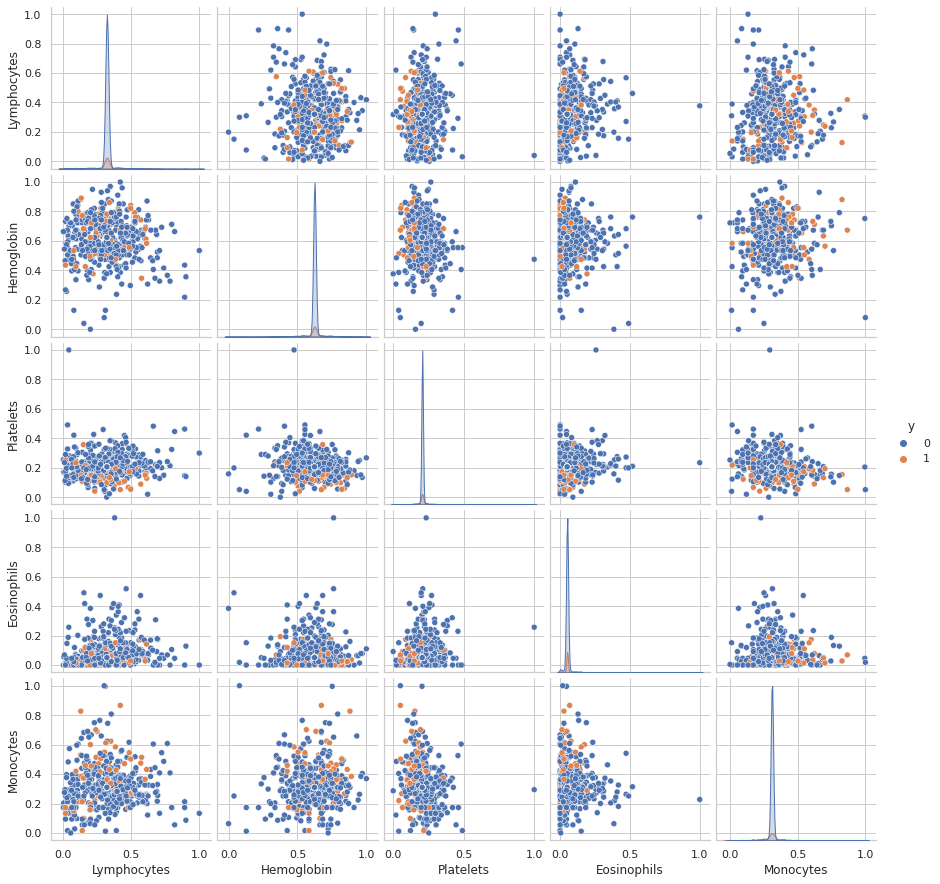

In [ ]:
complete_dataset = pd.concat([dataset123, pd.DataFrame({'y':y})], ignore_index = False, axis = 1)
sns.pairplot(complete_dataset, hue = 'y', vars = ['Lymphocytes', 'Hemoglobin', 'Platelets',  'Eosinophils', 'Monocytes'])

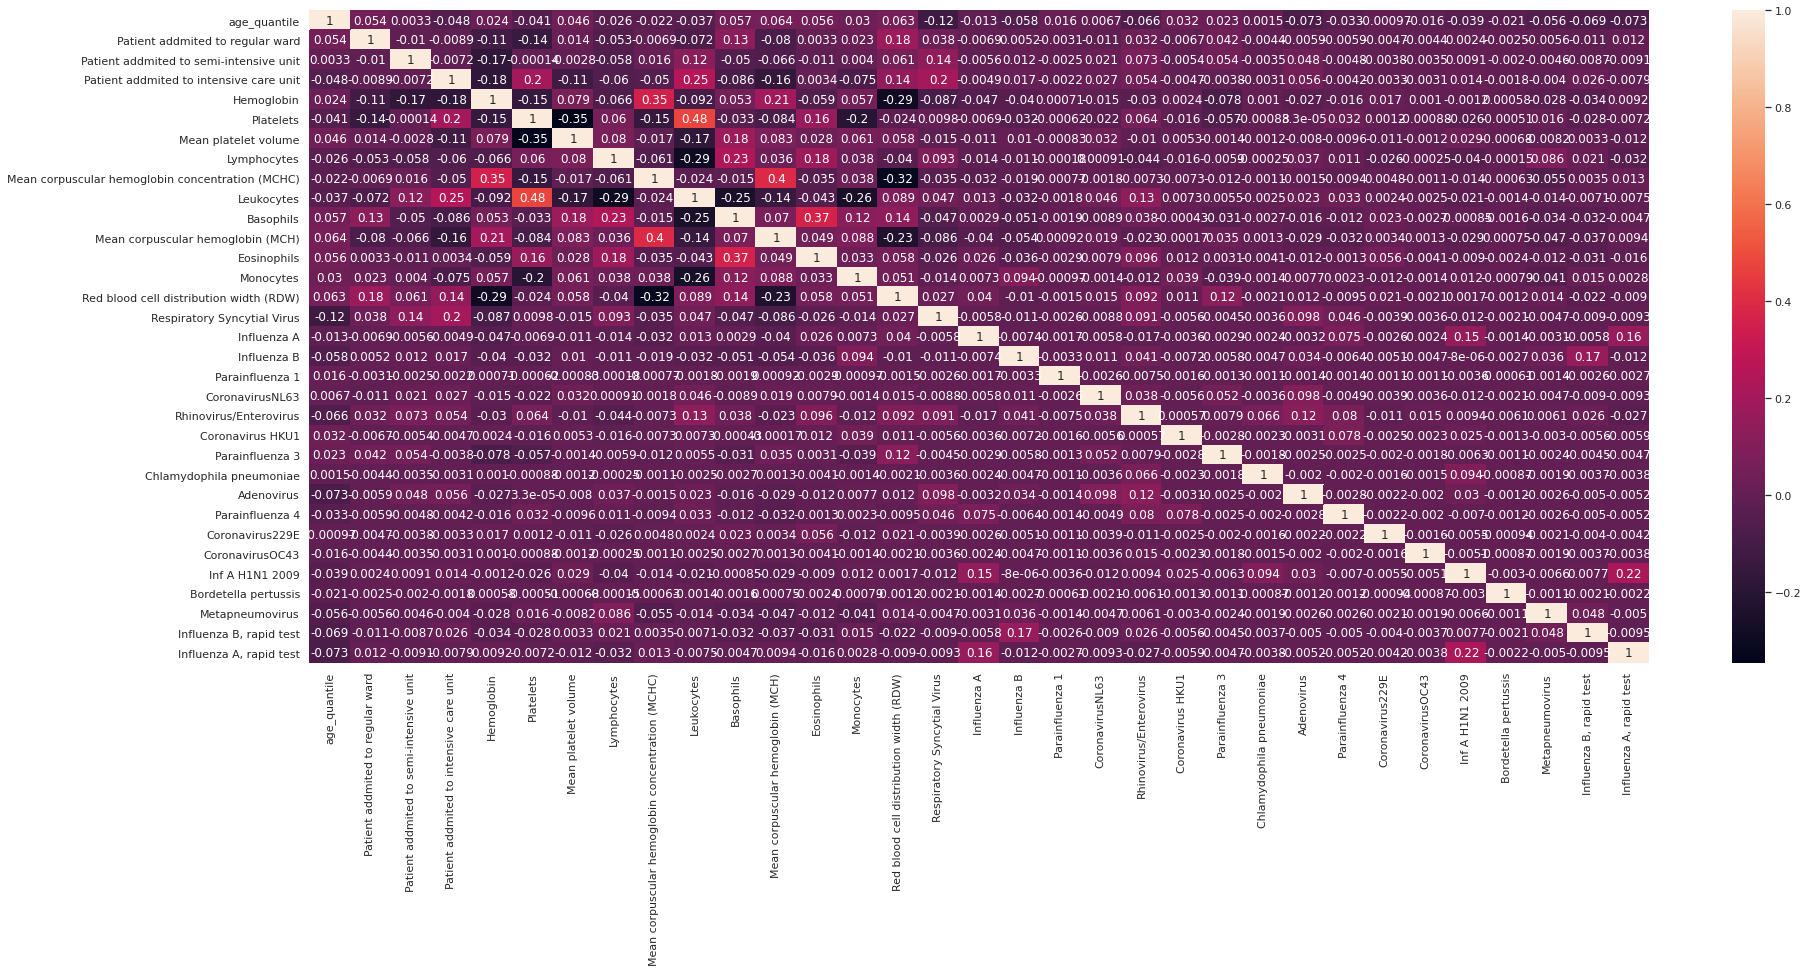

In [ ]:
plt.figure(figsize = (30,12))
sns.heatmap(dataset123.corr(), annot = True)

Model Training and Evaluation

Logistic Regression

In [ ]:
logisticRegr = LogisticRegression(solver='liblinear', random_state = 0 )
logisticRegr.fit(x_train, y_train)
results_test = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

cm = metrics.confusion_matrix(y_test, results_test)
print(cm)
print(classification_report(y_test, results_test))

0.9041666666666667
[[1079    1]
 [ 114    6]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1080
           1       0.86      0.05      0.09       120

    accuracy                           0.90      1200
   macro avg       0.88      0.52      0.52      1200
weighted avg       0.90      0.90      0.86      1200



Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

model = BernoulliNB()
model.fit(x_train, y_train)
results_test_nb = model.predict(x_test)

print(model.score(x_test,y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, results_test_nb))
print(classification_report(y_test, results_test_nb))

0.9041666666666667
[[1078    2]
 [ 113    7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1080
           1       0.78      0.06      0.11       120

    accuracy                           0.90      1200
   macro avg       0.84      0.53      0.53      1200
weighted avg       0.89      0.90      0.87      1200



Decision Tree

In [ ]:
from sklearn import tree
tree_classification = tree.DecisionTreeClassifier()
tree_classification = tree_classification.fit(x_train, y_train)

tree_results_test = tree_classification.predict(x_test)


print(tree_classification.score(x_test,y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, tree_results_test))
print(classification_report(y_test, tree_results_test))

0.9016666666666666
[[1074    6]
 [ 112    8]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1080
           1       0.57      0.07      0.12       120

    accuracy                           0.90      1200
   macro avg       0.74      0.53      0.53      1200
weighted avg       0.87      0.90      0.87      1200



XGBoost

In [ ]:
# Trying xgb
import xgboost as xgb
xg_class = xgb.XGBClassifier(
    learning_rate=0.02, 
    max_delta_step=0, 
    max_depth=10,
    min_child_weight=0.2, 
    missing=None, 
    n_estimators=300, 
    nthread=4,
    objective='binary:logistic', 
    reg_alpha=0.01, 
    reg_lambda = 0.01,
    scale_pos_weight=1, 
    seed=0, 
    silent=False, 
    subsample=0.9)

xg_fit=xg_class.fit(x_train, y_train)

xg_results_test = xg_fit.predict(x_test)

print(xg_fit.score(x_test,y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, xg_results_test))
print(classification_report(y_test, xg_results_test))


0.9058333333333334
[[1078    2]
 [ 111    9]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1080
           1       0.82      0.07      0.14       120

    accuracy                           0.91      1200
   macro avg       0.86      0.54      0.54      1200
weighted avg       0.90      0.91      0.87      1200



k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
results_test = classifier.predict(x_test)

print(classifier.score(x_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, results_test))
print(classification_report(y_test, results_test))

0.8741666666666666
[[1035   45]
 [ 106   14]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1080
           1       0.24      0.12      0.16       120

    accuracy                           0.87      1200
   macro avg       0.57      0.54      0.54      1200
weighted avg       0.84      0.87      0.85      1200



Support Vector Machines

In [ ]:
from sklearn import svm

svm_classification = svm.SVC()
svm_classification.fit(x_train, y_train)

svm_results_test = svm_classification.predict(x_test)

print(svm_classification.score(x_test,y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svm_results_test))
print(classification_report(y_test, svm_results_test))


0.9041666666666667
[[1079    1]
 [ 114    6]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1080
           1       0.86      0.05      0.09       120

    accuracy                           0.90      1200
   macro avg       0.88      0.52      0.52      1200
weighted avg       0.90      0.90      0.86      1200

